<a href="https://colab.research.google.com/github/jaaaamj0711/python_100/blob/main/Chapter1%20/Chapter1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 1 웹에서 주문 수를 분석하는 테크닉 10

In [ ]:
# git clone
!git clone https://github.com/wikibook/pyda100.git

In [ ]:
import os
import pandas as pd

In [ ]:
# 경로 설정
os.chdir("/content/pyda100/1장")

In [ ]:
# 데이터 확인
os.listdir()

['transaction_detail_2.csv',
 '제1장_answer.ipynb',
 'transaction_2.csv',
 '.ipynb_checkpoints',
 'transaction_detail_1.csv',
 'item_master.csv',
 'customer_master.csv',
 'transaction_1.csv']

## **Technic 1: 데이터를 읽어보자**

### 고객 데이터
- 이름, 성별 등 고객에 관한 데이터

In [ ]:
customer_master = pd.read_csv("customer_master.csv")
customer_master.head()

,customer_id,customer_name,registration_date,email,gender,age,birth,pref
0,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시
1,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시
2,AS834628,김도윤,2019-01-01 2:00,hisano_yuki@example.com,F,63,1956-01-02,광주광역시
3,AS345469,김시우,2019-01-01 4:48,tsuruoka_kaoru@example.com,M,74,1945-03-25,인천광역시
4,GD892565,김주원,2019-01-01 4:54,oouchi_takashi@example.com,M,54,1965-08-05,울산광역시


### 취급하는 상품 데이터
- 상품명 가격 등

In [ ]:
item_master = pd.read_csv("item_master.csv")
item_master.head()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


### 구매내역 데이터

In [ ]:
transaction_1 = pd.read_csv("transaction_1.csv")
transaction_1.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


### transaction_1과 연결된 구매내역 분할 데이터

In [ ]:
transaction_2 = pd.read_csv("transaction_2.csv")
transaction_2.head()

,transaction_id,price,payment_date,customer_id
0,T0000005113,295000,2019-06-15 07:20:27,TS169261
1,T0000005114,50000,2019-06-15 07:35:47,HI599892
2,T0000005115,85000,2019-06-15 07:56:36,HI421757
3,T0000005116,50000,2019-06-15 08:40:55,OA386378
4,T0000005117,120000,2019-06-15 08:44:23,TS506913


### 구매내역 상세 데이터

In [ ]:
transaction_detail_1 = pd.read_csv("transaction_detail_1.csv")
transaction_detail_1.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


### transaction_detail_1과 연결된 분할 데이터

In [ ]:
transaction_detail_2 = pd.read_csv("transaction_detail_2.csv")
transaction_detail_2.head()

,detail_id,transaction_id,item_id,quantity
0,5000,T0000004870,S002,3
1,5001,T0000004871,S003,1
2,5002,T0000004872,S001,2
3,5003,T0000004873,S004,1
4,5004,T0000004874,S003,2


## **Technic 2: 데이터를 결합(유니온)**

- transaction1과 transaction2는 세로로 결합을 해줘야 한다.
- pd.concat을 사용해서 결합을 해보자.

In [ ]:
transaction = pd.concat([transaction_1, transaction_2], ignore_index=True) #i gnore_index=True : 기존 인덱스를 무시
transaction.head(3)

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120


In [ ]:
# 결합 확인
print(len(transaction_1))
print(len(transaction_2))
print(len(transaction))

5000
1786
6786


In [ ]:
transaction_detail = pd.concat([transaction_detail_1, transaction_detail_2], ignore_index=True) #i gnore_index=True : 기존 인덱스를 무시
transaction_detail.head(3)

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1


## **Technic 3: 매출 데이터끼리 결합(조인)**

데이터를 조인할때는 다음 2가지를 생각하면서 하자.

1. Q. 부족한 데이터가 무엇이지?  
  A. payment_data, customer_id를 추가하고 싶다!

2. Q. 공통되는 칼럼은 무엇이지?  
  A. transaction_id

In [ ]:
join_data = pd.merge(transaction_detail, transaction[['transaction_id', 'payment_date', 'customer_id']],
                     on = 'transaction_id', how='left')
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


In [ ]:
# 결합 확인
print(len(transaction_detail))
print(len(transaction))
print(len(join_data))

7144
6786
7144


## **Technic 4: 마스터 데이터 결합(조인)**





데이터를 조인할때는 다음 2가지를 생각하면서 하자.

1. Q. 부족한 데이터가 무엇이지?  
  A. customer_master, item_master 추가하고 싶다!

2. Q. 공통되는 칼럼은 무엇이지?  
  A. costomer_id, item_id

In [ ]:
join_data = pd.merge(join_data, customer_master, on = 'customer_id', how ='left')
join_data = pd.merge(join_data, item_master, on = 'item_id', how = 'left')
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,PC-B,85000


## **Technic 5: 필요한 데이터 생성**

결합을 하는 과정에서 매출데이터가 사라졌기 때문에 따로 계산하여 새로운 칼럼을 만들어야 한다.   
매출은 다음과 같이 아이템에 가격과 판매 수를 곱하여 계산할 수 있다.

In [ ]:
join_data['price'] = join_data['quantity'] * join_data['item_price']
join_data[['quantity','item_price','price']].head()

,quantity,item_price,price
0,1,210000,210000
1,1,50000,50000
2,1,120000,120000
3,1,210000,210000
4,2,85000,170000


## **Technic 6: 데이터 검산**

직접 계산한값이 실제값과 일치하는지 확인을 할 필요가 있다.

In [ ]:
# 데이터 검토
print(join_data['price'].sum())
print(transaction['price'].sum())

971135000
971135000


## **Technic 7: 통계량을 확인하자**

In [ ]:
join_data.isnull().sum()

detail_id            0
transaction_id       0
item_id              0
quantity             0
payment_date         0
customer_id          0
customer_name        0
registration_date    0
email                0
gender               0
age                  0
birth                0
pref                 0
item_name            0
item_price           0
price                0
dtype: int64

결측치는 존재하지 않음.

In [ ]:
join_data.describe()

,detail_id,quantity,age,item_price,price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,50.265677,121698.628219,135937.150056
std,2062.439494,0.513647,17.190314,64571.311830,68511.453297
min,0.000000,1.000000,20.000000,50000.000000,50000.000000
25%,1785.750000,1.000000,36.000000,50000.000000,85000.000000
50%,3571.500000,1.000000,50.000000,102500.000000,120000.000000
75%,5357.250000,1.000000,65.000000,187500.000000,210000.000000
max,7143.000000,4.000000,80.000000,210000.000000,420000.000000


## **Technic 8: 월별로 데이터를 집계해 보자**

In [ ]:
# 데이터 타입 확인
join_data.dtypes

detail_id             int64
transaction_id       object
item_id              object
quantity              int64
payment_date         object
customer_id          object
customer_name        object
registration_date    object
email                object
gender               object
age                   int64
birth                object
pref                 object
item_name            object
item_price            int64
price                 int64
dtype: object

payment_date 데이터는 현재 object 형태인데 편의를 위해 데이터 타입을 datetime형태로 변환을 하자.

In [ ]:
join_data['payment_date'] = pd.to_datetime(join_data['payment_date']) # 형 변환
join_data['payment_month'] = join_data['payment_date'].dt.strftime("%Y%m") # 년, 월 추출
join_data[['payment_date', 'payment_month']].head()

,payment_date,payment_month
0,2019-02-01 01:36:57,201902
1,2019-02-01 01:37:23,201902
2,2019-02-01 02:34:19,201902
3,2019-02-01 02:47:23,201902
4,2019-02-01 04:33:46,201902


In [ ]:
join_data.groupby('payment_month').sum()['price']

payment_month
201902    160185000
201903    160370000
201904    160510000
201905    155420000
201906    164030000
201907    170620000
Name: price, dtype: int64

- 5월에 매출이 낮아진 경향이 있음.
- 하지만, 다시 6월~7월에 매출이 올랐음.
- 가장 높은 매출을 찍은 달은 7월.

## **Technic 9: 월별, 데이터를 집계해 보자**

In [ ]:
join_data.groupby(["payment_month","item_name"]).sum()[["price", "quantity"]]

price  quantity
payment_month item_name                    
201902        PC-A       24150000       483
              PC-B       25245000       297
              PC-C       19800000       165
              PC-D       31140000       173
              PC-E       59850000       285
201903        PC-A       26000000       520
              PC-B       25500000       300
              PC-C       19080000       159
              PC-D       25740000       143
              PC-E       64050000       305
201904        PC-A       25900000       518
              PC-B       23460000       276
              PC-C       21960000       183
              PC-D       24300000       135
              PC-E       64890000       309
201905        PC-A       24850000       497
              PC-B       25330000       298
              PC-C       20520000       171
              PC-D       25920000       144
              PC-E       58800000       280
201906        PC-A       26000000       520
              PC-B       23970000       282
              PC-C       21840000       182
              PC-D       28800000       160
              PC-E       63420000       302
201907        PC-A       25250000       505
              PC-B       28220000       332
              PC-C       19440000       162
              PC-D       26100000       145
              PC-E       71610000       341

In [ ]:
pd.pivot_table(join_data, index='item_name', columns='payment_month', values=['price', 'quantity'], aggfunc='sum')

price                      ... quantity              
payment_month    201902    201903    201904  ...   201905 201906 201907
item_name                                    ...                       
PC-A           24150000  26000000  25900000  ...      497    520    505
PC-B           25245000  25500000  23460000  ...      298    282    332
PC-C           19800000  19080000  21960000  ...      171    182    162
PC-D           31140000  25740000  24300000  ...      144    160    145
PC-E           59850000  64050000  64890000  ...      280    302    341

[5 rows x 12 columns]

- 매출의 합은 PC-E 상품이 가장 높지만, 수량은 값이 가장 저렴한 PC-A가 가장 많다.  
- 앞 결과에서 매출이 감소한 5월을 살펴보면 PC-B, PC-D는 증가를 했지만, PC-E는 매출이 많이 감소한 경항을 보인다.

## **Technic 10: 상품별 매출 추이 시각화**

In [ ]:
graph_data = pd.pivot_table(join_data, index='payment_month', columns='item_name', values='price', aggfunc='sum')
graph_data.head()

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_month,,,,,
201902,24150000,25245000,19800000,31140000,59850000
201903,26000000,25500000,19080000,25740000,64050000
201904,25900000,23460000,21960000,24300000,64890000
201905,24850000,25330000,20520000,25920000,58800000
201906,26000000,23970000,21840000,28800000,63420000


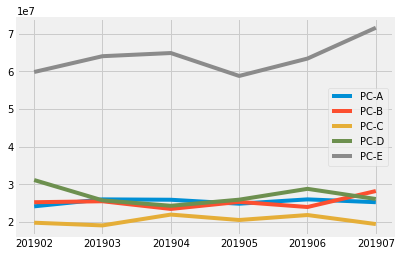

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
plt.plot(list(graph_data.index), graph_data["PC-A"], label='PC-A')
plt.plot(list(graph_data.index), graph_data["PC-B"], label='PC-B')
plt.plot(list(graph_data.index), graph_data["PC-C"], label='PC-C')
plt.plot(list(graph_data.index), graph_data["PC-D"], label='PC-D')
plt.plot(list(graph_data.index), graph_data["PC-E"], label='PC-E')
plt.legend()